In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

## Read the CSV and Perform Basic Data Cleaning¶

In [4]:
input_data_file = "sort_data.txt"
#df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t')
df = pd.read_csv(os.path.join("..", "Data", input_data_file),sep='\t', nrows=150000)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df

C:\Users\gleix\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,...,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,year,leie_code,leie
0,1205963402,M,I,ROCKVILLE,2.08521e+08,MD,US,Allergy/Immunology,Y,O,...,N,153.0,13.0,153.0,11.800000,25.000000,7.897516,2012,1128b4,On_List
1,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,93.0,65.0,93.0,129.454731,209.408602,97.705054,2017,1128a1,On_List
2,1952417610,M,I,HOUSTON,7.70813e+08,TX,US,Neurology,Y,O,...,N,36.0,35.0,36.0,40.992778,50.123611,25.856944,2014,1128a1,On_List
3,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,724.0,210.0,724.0,48.580000,150.000000,47.610000,2017,1128a1,On_List
4,1467447557,M,I,FLINT,4.85325e+08,MI,US,Family Practice,Y,O,...,N,11.0,11.0,11.0,25.000000,25.000000,6.985455,2017,1128a1,On_List
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1053420026,M,I,AUSTIN,787276431,TX,US,Diagnostic Radiology,Y,O,...,N,12.0,12.0,12.0,116.450000,288.000000,83.691667,2016,None,Not
149996,1053420026,M,I,AUSTIN,787276431,TX,US,Diagnostic Radiology,Y,F,...,N,13.0,13.0,13.0,25.876154,110.307692,20.285385,2016,None,Not
149997,1053420026,M,I,AUSTIN,787276431,TX,US,Diagnostic Radiology,Y,O,...,N,11.0,11.0,11.0,86.860000,230.000000,63.639091,2016,None,Not
149998,1053420026,M,I,AUSTIN,787276431,TX,US,Diagnostic Radiology,Y,F,...,N,14.0,14.0,14.0,34.611429,138.071429,25.085714,2016,None,Not


In [5]:
df['nppes_provider_gender'] = df['nppes_provider_gender'].fillna('O')

In [6]:
df.columns

Index(['npi', 'nppes_provider_gender', 'nppes_entity_code',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt', 'year',
       'leie_code', 'leie'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   npi                               150000 non-null  int64  
 1   nppes_provider_gender             150000 non-null  object 
 2   nppes_entity_code                 149999 non-null  object 
 3   nppes_provider_city               149999 non-null  object 
 4   nppes_provider_zip                149999 non-null  object 
 5   nppes_provider_state              149999 non-null  object 
 6   nppes_provider_country            149999 non-null  object 
 7   provider_type                     149999 non-null  object 
 8   medicare_participation_indicator  149999 non-null  object 
 9   place_of_service                  149999 non-null  object 
 10  hcpcs_code                        149999 non-null  object 
 11  hcpcs_description                 149999 non-null  o

## Select your features (columns)

In [8]:
# Set features. This will also be used as your x values.
selected_features = df[['line_srvc_cnt', 'place_of_service', 'hcpcs_drug_indicator', 'nppes_entity_code', 'nppes_provider_gender',
                       'medicare_participation_indicator', 'leie']]
selected_features = selected_features.dropna()
selected_features

,line_srvc_cnt,place_of_service,hcpcs_drug_indicator,nppes_entity_code,nppes_provider_gender,medicare_participation_indicator,leie
0,153.0,O,N,I,M,Y,On_List
1,93.0,O,N,I,M,Y,On_List
2,36.0,O,N,I,M,Y,On_List
3,724.0,O,N,I,M,Y,On_List
4,11.0,O,N,I,M,Y,On_List
...,...,...,...,...,...,...,...
149995,12.0,O,N,I,M,Y,Not
149996,13.0,F,N,I,M,Y,Not
149997,11.0,O,N,I,M,Y,Not
149998,14.0,F,N,I,M,Y,Not


## Data Pre-Processing

In [9]:
disposition = selected_features["leie"]
disposition_names = ["Not", "On_List"]
selected_features = selected_features.drop("leie", axis=1)
feature_names = selected_features.columns
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   line_srvc_cnt                     149999 non-null  float64
 1   place_of_service                  149999 non-null  object 
 2   hcpcs_drug_indicator              149999 non-null  object 
 3   nppes_entity_code                 149999 non-null  object 
 4   nppes_provider_gender             149999 non-null  object 
 5   medicare_participation_indicator  149999 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.0+ MB


In [10]:
mike_df2 = disposition
mike3 = mike_df2.to_frame()
mike3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   leie    149999 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [11]:
mike3.leie.value_counts()

Not        89677
On_List    60322
Name: leie, dtype: int64

In [12]:
data = pd.get_dummies(selected_features)
data

,line_srvc_cnt,place_of_service_F,place_of_service_O,hcpcs_drug_indicator_N,hcpcs_drug_indicator_Y,nppes_entity_code_I,nppes_entity_code_O,nppes_provider_gender_F,nppes_provider_gender_M,nppes_provider_gender_O,medicare_participation_indicator_N,medicare_participation_indicator_Y
0,153.0,0,1,1,0,1,0,0,1,0,0,1
1,93.0,0,1,1,0,1,0,0,1,0,0,1
2,36.0,0,1,1,0,1,0,0,1,0,0,1
3,724.0,0,1,1,0,1,0,0,1,0,0,1
4,11.0,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,12.0,0,1,1,0,1,0,0,1,0,0,1
149996,13.0,1,0,1,0,1,0,0,1,0,0,1
149997,11.0,0,1,1,0,1,0,0,1,0,0,1
149998,14.0,1,0,1,0,1,0,0,1,0,0,1


In [13]:
data = data.drop(['nppes_entity_code_O', 'medicare_participation_indicator_Y', 'place_of_service_O', 'hcpcs_drug_indicator_Y'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   line_srvc_cnt                       149999 non-null  float64
 1   place_of_service_F                  149999 non-null  uint8  
 2   hcpcs_drug_indicator_N              149999 non-null  uint8  
 3   nppes_entity_code_I                 149999 non-null  uint8  
 4   nppes_provider_gender_F             149999 non-null  uint8  
 5   nppes_provider_gender_M             149999 non-null  uint8  
 6   nppes_provider_gender_O             149999 non-null  uint8  
 7   medicare_participation_indicator_N  149999 non-null  uint8  
dtypes: float64(1), uint8(7)
memory usage: 3.3 MB


In [14]:
X = data
y = disposition
print(X.shape, y.shape)

(149999, 8) (149999,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [17]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [19]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [22]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 11,202
Trainable params: 11,202
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(X_train_scaled.shape, y_train_categorical.shape)

(112499, 8) (112499, 2)


In [25]:
X_train_scaled

array([[4.06188109e-06, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.06188109e-06, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.10614436e-06, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.38934182e-07, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.85741101e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19467091e-06, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [26]:
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [27]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
3516/3516 - 2s - loss: 0.6090 - accuracy: 0.6538
Epoch 2/60
3516/3516 - 2s - loss: 0.6079 - accuracy: 0.6565
Epoch 3/60
3516/3516 - 2s - loss: 0.6078 - accuracy: 0.6561
Epoch 4/60
3516/3516 - 2s - loss: 0.6075 - accuracy: 0.6561
Epoch 5/60
3516/3516 - 2s - loss: 0.6075 - accuracy: 0.6565
Epoch 6/60
3516/3516 - 2s - loss: 0.6074 - accuracy: 0.6563
Epoch 7/60
3516/3516 - 2s - loss: 0.6074 - accuracy: 0.6564
Epoch 8/60
3516/3516 - 3s - loss: 0.6073 - accuracy: 0.6564
Epoch 9/60
3516/3516 - 3s - loss: 0.6072 - accuracy: 0.6564
Epoch 10/60
3516/3516 - 2s - loss: 0.6072 - accuracy: 0.6563
Epoch 11/60
3516/3516 - 3s - loss: 0.6071 - accuracy: 0.6564
Epoch 12/60
3516/3516 - 2s - loss: 0.6072 - accuracy: 0.6564
Epoch 13/60
3516/3516 - 2s - loss: 0.6072 - accuracy: 0.6564
Epoch 14/60
3516/3516 - 3s - loss: 0.6072 - accuracy: 0.6564
Epoch 15/60
3516/3516 - 3s - loss: 0.6072 - accuracy: 0.6564
Epoch 16/60
3516/3516 - 3s - loss: 0.6071 - accuracy: 0.6564
Epoch 17/60
3516/3516 - 3s - loss

## Quantify our Trained Model

In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1172/1172 - 1s - loss: 0.6056 - accuracy: 0.6589
Normal Neural Network - Loss: 0.6055867671966553, Accuracy: 0.6589066386222839


## Make Predictions

In [74]:
encoded_predictions = model.predict_classes(X_test_scaled[:1000])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [75]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:1000])}")

Predicted classes: ['On_List' 'On_List' 'Not' 'Not' 'Not' 'Not' 'On_List' 'On_List' 'On_List'
 'Not' 'Not' 'Not' 'Not' 'On_List' 'On_List' 'Not' 'Not' 'On_List'
 'On_List' 'Not' 'Not' 'On_List' 'On_List' 'On_List' 'Not' 'On_List' 'Not'
 'On_List' 'Not' 'On_List' 'On_List' 'On_List' 'Not' 'On_List' 'Not'
 'On_List' 'On_List' 'On_List' 'Not' 'On_List' 'Not' 'Not' 'Not' 'On_List'
 'Not' 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'On_List' 'On_List'
 'On_List' 'Not' 'Not' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'On_List'
 'On_List' 'On_List' 'Not' 'On_List' 'On_List' 'Not' 'On_List' 'Not' 'Not'
 'Not' 'On_List' 'Not' 'On_List' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not' 'Not'
 'Not' 'On_List' 'On_List' 'On_List' 'Not' 'Not' 'On_List' 'On_List'
 'On_List' 'On_List' 'On_List' 'Not' 'Not' 'Not' 'On_List' 'On_List'
 'On_List' 'On_List' 'Not' 'Not' 'Not' 'Not' 'Not' 'On_List' 'On_List'
 'Not' 'On_List' 'Not' 'Not' 'On_List' 'Not' 'On_List' 'On_List' 'Not'
 'On_List' 'Not' 'On_List' 'Not' 'Not' 'Not' 'On

In [76]:
import seaborn as sn

In [77]:
y_perdiction_results = prediction_labels
y_results = y_test[:1000]
display_data = pd.DataFrame({'Actuals':y_results, 'Predictions':y_perdiction_results})
display_data.reset_index(drop=True, inplace=True)
display_data

,Actuals,Predictions
0,On_List,On_List
1,Not,On_List
2,Not,Not
3,Not,Not
4,Not,Not
...,...,...
995,On_List,On_List
996,On_List,On_List
997,Not,On_List
998,On_List,On_List


In [78]:
y_test_temp = y_test[:1000]
y_Predicted = encoded_predictions
y_Actual = []

for y_data in y_test_temp:
    if(y_data == "Not"):
        y_Actual.append(0)
    else:
        y_Actual.append(1)

In [79]:
new_data = pd.DataFrame({'y_Actual':y_Actual, 'y_Predicted':y_Predicted})
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   y_Actual     1000 non-null   int64
 1   y_Predicted  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [80]:
new_data.reset_index(drop=True, inplace=True)
new_data

,y_Actual,y_Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
995,1,1
996,1,1
997,0,1
998,1,1


In [81]:
#df_new = pd.DataFrame(new_data, columns=['y_Actual','y_Predicted'])
#df_new.info()

In [82]:
#df_new

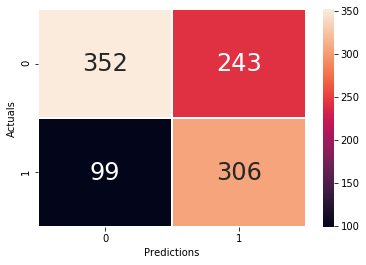

In [83]:
#df_new = pd.DataFrame(new_data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(new_data['y_Actual'], new_data['y_Predicted'], rownames=['Actuals'], colnames=['Predictions'])

sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt=".0f", annot_kws={'size':24})
plt.show()

In [84]:
confusion_matrix

Predictions,0,1
Actuals,,
0,352,243
1,99,306


In [85]:
confusion_matrix = confusion_matrix.rename(columns={0 : "Not on LEIE List", 1 : "On LEIE List"})
confusion_matrix = confusion_matrix.rename(index={0 : "Not on LEIE List", 1 : "On LEIE List"})

In [86]:
confusion_matrix

Predictions,Not on LEIE List,On LEIE List
Actuals,,
Not on LEIE List,352,243
On LEIE List,99,306


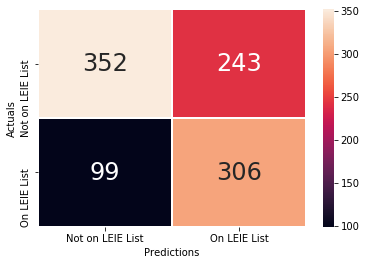

In [87]:
sn.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt=".0f", annot_kws={'size':24})
plt.show()